<a href="https://www.kaggle.com/code/chretienmartinez/vegetation-fires-viz?scriptVersionId=95093111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set_theme()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegetation-fires-in-cape-town/fire_log_cape_town.csv


In [2]:
df = pd.read_csv('/kaggle/input/vegetation-fires-in-cape-town/fire_log_cape_town.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88480 entries, 0 to 88479
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Incident_category        88480 non-null  object
 1   District                 84746 non-null  object
 2   Description_of_Incident  75662 non-null  object
 3   Wind                     58358 non-null  object
 4   Details_of_cause         62653 non-null  object
 5   Source_of_water          43997 non-null  object
 6   Temperature              59454 non-null  object
 7   Fire_Damage_-_Details    45412 non-null  object
 8   Suburb                   87925 non-null  object
 9   FPA_Classification       85487 non-null  object
 10  Street                   87691 non-null  object
 11  What_Was_Burning         59463 non-null  object
 12  Equipment_used           60863 non-null  object
 13  Incident_number          88480 non-null  object
 14  Weather                  59593 non-nul

# Quick Data Viz Practice with Seaborn
A quick practice session with Seaborn on this categorical data.

In [3]:
#Converting Datetime series dtype to datetime object
df2 =  df.iloc[:,[1,3,4,14,18]].copy()
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df2['day']  = df2['Datetime'].dt.day_name()
df2['year'] = df2['Datetime'].dt.year
df2['month'] = df2['Datetime'].dt.month_name()
df2.head()

,District,Wind,Details_of_cause,Weather,Datetime,day,year,month
0,North,NaN,False Alarm,NaN,2009-01-01 00:03:00,Thursday,2009,January
1,West,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,Fine,2009-01-01 00:07:00,Thursday,2009,January
2,East,Light Breeze,Unknown,Fine,2009-01-01 00:16:00,Thursday,2009,January
3,North,Moderate,Undetermined,Fine,2009-01-01 00:20:00,Thursday,2009,January
4,North,Light Breeze,Passer-By Dropping Alight,Fine,2009-01-01 00:22:00,Thursday,2009,January


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88480 entries, 0 to 88479
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   District          84746 non-null  object        
 1   Wind              58358 non-null  object        
 2   Details_of_cause  62653 non-null  object        
 3   Weather           59593 non-null  object        
 4   Datetime          88480 non-null  datetime64[ns]
 5   day               88480 non-null  object        
 6   year              88480 non-null  int64         
 7   month             88480 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 5.4+ MB


In [5]:
#Exploratory analysis
df2.iloc[:,5].value_counts(normalize=True).apply(lambda x: x*100).sort_values(ascending=False)

Friday       14.569394
Tuesday      14.538879
Saturday     14.430380
Monday       14.336573
Thursday     14.187387
Sunday       14.154611
Wednesday    13.782776
Name: day, dtype: float64

In [6]:
#Exploratory analysis
df2.iloc[:,7].value_counts(normalize=True).apply(lambda x: x*100).sort_values(ascending=False)

January      17.931736
February     14.016727
March        11.963156
December     11.399186
November     10.666817
April         7.432188
October       5.176311
May           5.018083
September     4.315099
August        4.073237
July          4.022378
June          3.985081
Name: month, dtype: float64

In [7]:
# So many different causes of the fire. Too many variations on the same event.
df2.iloc[:,2] = df2.iloc[:,2].str.strip().str.lower()
df2.iloc[:,:3].head(20)

,District,Wind,Details_of_cause
0,North,NaN,false alarm
1,West,Light Breeze,ignited signal flare dropping into reeds and i...
2,East,Light Breeze,unknown
3,North,Moderate,undetermined
4,North,Light Breeze,passer-by dropping alight
5,North,NaN,passer by dropping a light
6,East,NaN,NaN
7,North,Moderate,unknown
8,North,Light Breeze,possible setting off of fire works igniting dr...
9,West,NaN,NaN


In [8]:
print(f"Original\n\n{df2['District'].value_counts(dropna=False)}\n\nContains {df2['District'].value_counts().sum()} records")

Original

East                36074
North               29010
West                19463
NaN                  3734
East|North             52
West|North             33
East|West              31
North|West             17
North|East             16
West|East               9
East|North|West         9
East|East|East          6
West|North|East         6
West|West|West          4
North|East|West         3
North|North             2
East|East               2
North|North|West        1
West|East|North         1
East|North|East         1
West|East|West          1
East|East|North         1
North|East|East         1
North|West|North        1
East|East|West          1
East|West|North         1
Name: District, dtype: int64

Contains 84746 records


### Too many variations on District
Instead of ignoring the values, let's combine them so that we get a broader representation. Will use Frequent Categorical Imputation to Reduce the NaN

In [9]:
df2['District'] = df2['District'].str.extract(r'(\w+)|')
df2['District'].fillna('East', inplace=True)
print(f"Newly parsed\n\n{df2['District'].value_counts(dropna=False)}\n\nContains {df2['District'].value_counts().sum()} records")

Newly parsed

East     39912
North    29051
West     19517
Name: District, dtype: int64

Contains 88480 records


Now, lets do something similar for our Wind series

In [10]:
df2['Wind'].value_counts(dropna=False)

Light Breeze    36511
NaN             30122
Moderate        13237
Nil              5272
Strong           2715
Gale-Force        622
FR                  1
Name: Wind, dtype: int64

Will use Frequent Categorical Imputation to Reduce the NaN

In [11]:
df2['Wind'].fillna('Light Breeze', inplace=True)
df2['Wind'] = df2['Wind'].str.strip()
df2['Wind'] = df2['Wind'].str.replace('FR','Gale-Force')
df2['Wind'].value_counts(dropna=False)

Light Breeze    66633
Moderate        13237
Nil              5272
Strong           2715
Gale-Force        623
Name: Wind, dtype: int64

In [12]:
df2['Weather'].value_counts(dropna=False)
df2['Weather'].fillna('Fine', inplace=True)
df2['Weather'] = df2['Weather'].str.extract(r'(\w+)|')
df2['Weather'] = df2['Weather'].str.replace('2020','Fine')
df2['Weather'] = df2['Weather'].str.replace('Stormy','Fine')
df2['Weather'].value_counts(dropna=False)


Fine        63078
Clear       19562
Overcast     5092
Raining       748
Name: Weather, dtype: int64

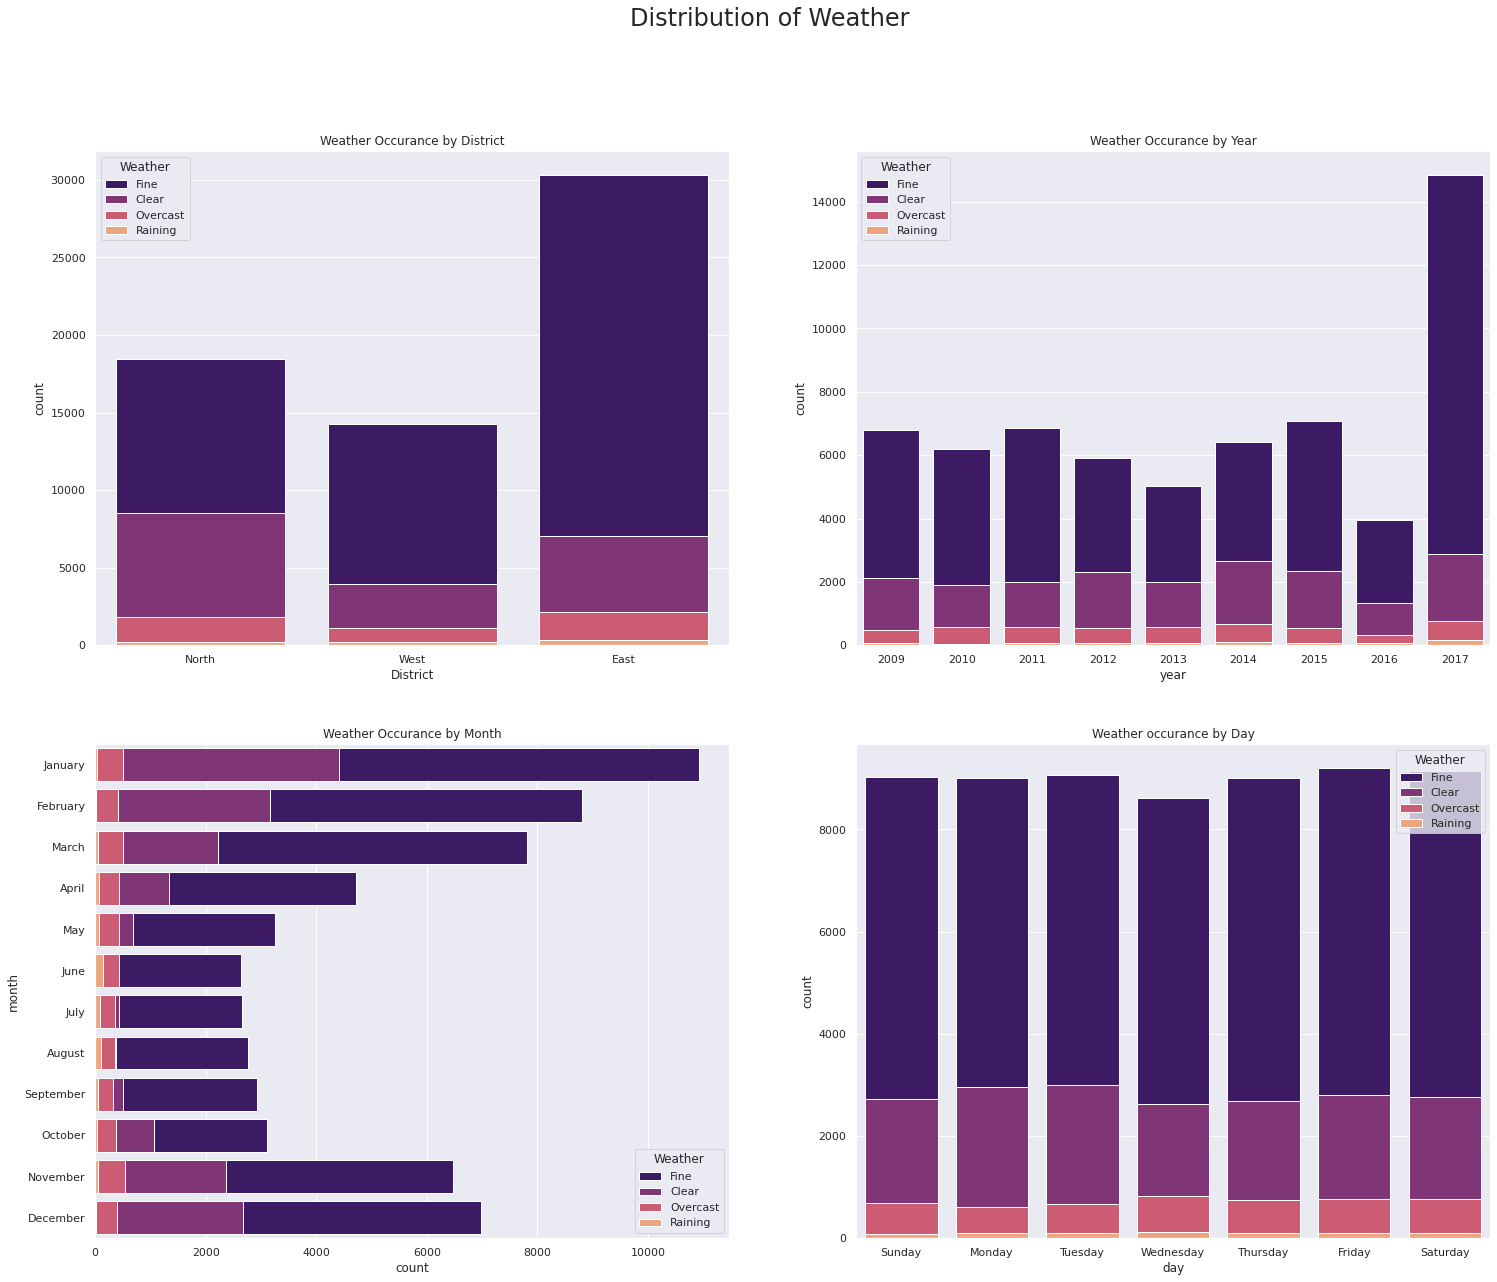

In [13]:
fig, axes = plt.subplots(2,2,figsize=(25,20))
plt.suptitle('Distribution of Weather',fontsize=24)
sns.countplot(x='District',hue='Weather',ax=axes[0,0], data=df2, palette='magma',dodge=False)
axes[0,0].set_title('Weather Occurance by District')
sns.countplot(x='year',hue='Weather',ax=axes[0,1], data=df2, palette='magma', dodge=False)
axes[0,1].set_title('Weather Occurance by Year')
sns.countplot(y='month', ax=axes[1,0], hue='Weather',data=df2, palette='magma', dodge=False)
axes[1,0].set_title('Weather Occurance by Month')
sns.countplot(x='day', ax=axes[1,1], data=df2, hue='Weather',palette='magma', dodge=False, order=['Sunday',
                                                                                   'Monday',
                                                                                   'Tuesday',
                                                                                   'Wednesday',
                                                                                   'Thursday',
                                                                                   'Friday',
                                                                                   'Saturday'])
axes[1,1].set_title('Weather occurance by Day')
plt.show()
